In [2]:
import torch 
import torchvision #contains utilities to deal with image dataset 
from torchvision.datasets import MNIST,FashionMNIST
import torchvision.transforms as transforms #tansforming the dataset into tensors
from torch.utils.data.sampler import SubsetRandomSampler 
import matplotlib.pyplot as plt
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [3]:
dataset = FashionMNIST(root='/content/sample_data/Datasets',download= True)
dataset_Mnist = MNIST(root='/content/sample_data/Datasets',download= True)

60000
60000


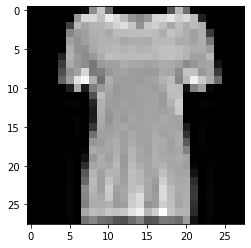

In [4]:
print(len(dataset))
print(len(dataset_Mnist))
image,label = dataset[10]
plt.imshow(image,cmap='gray')

In [5]:
transformed_dataset = FashionMNIST('/content/sample_data/Datasets',train= True, transform= transforms.ToTensor())
training_dataset , validation_dataset = random_split(transformed_dataset,[50000,10000])
testing_dataset = FashionMNIST('/content/sample_data/Datasets',train= False, transform= transforms.ToTensor())
print(len(training_dataset),len(testing_dataset))

50000 10000


In [6]:
batch_size = 100 
input_size = 28*28
class_label = 10 
loss_func = F.cross_entropy
# The shuffle is set to True for training data to load different images each time at each epoch. This will make model more robust and avoid over/underfitting.
train_loader = DataLoader(training_dataset,batch_size=batch_size,shuffle= True )
val_loader = DataLoader(validation_dataset,batch_size=batch_size)
test_loader = DataLoader(testing_dataset,batch_size=batch_size)

In [7]:
for image,labl in train_loader:
  print(image.shape)
  print(label)
  break


torch.Size([100, 1, 28, 28])
0


In [8]:
class TrialModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size,class_label)

  def forward(self,xb):
    xb = xb.reshape(-1,784)
    out = self.linear(xb) # matrix multiplicattion and addition of bias
    return out

model = TrialModel()

In [9]:
print(model.linear.weight.shape,model.linear.bias.shape)
for image, labels in train_loader:
  outputs = model(image)
  break
print(outputs.shape )
print('Sample outputs :\n', outputs[:2].data)

torch.Size([10, 784]) torch.Size([10])
torch.Size([100, 10])
Sample outputs :
 tensor([[ 0.3269,  0.2604,  0.2146, -0.3353, -0.1574,  0.4743, -0.0636, -0.1491,
         -0.3189, -0.4345],
        [ 0.1245,  0.2928,  0.0799, -0.5800, -0.1999, -0.1656,  0.2610, -0.3543,
         -0.0100, -0.2639]])


In [10]:
probability = F.softmax(outputs,dim=1)
print('SampleProbability', probability[:2].data)
print(torch.sum(probability[0]).item())



SampleProbability tensor([[0.1350, 0.1263, 0.1206, 0.0696, 0.0832, 0.1564, 0.0913, 0.0838, 0.0708,
         0.0630],
        [0.1187, 0.1405, 0.1135, 0.0587, 0.0858, 0.0888, 0.1361, 0.0736, 0.1038,
         0.0805]])
1.0


In [11]:
maxprob,pred = torch.max(probability,dim = 1)
print(maxprob)
print(pred)

tensor([0.1564, 0.1405, 0.1642, 0.1480, 0.1895, 0.1756, 0.1237, 0.1335, 0.1302,
        0.1437, 0.1675, 0.1217, 0.1327, 0.1892, 0.1224, 0.1391, 0.1460, 0.1640,
        0.1657, 0.1522, 0.1431, 0.1413, 0.1210, 0.1391, 0.1349, 0.1495, 0.1395,
        0.1158, 0.1564, 0.1542, 0.1650, 0.1251, 0.1630, 0.1376, 0.1455, 0.1484,
        0.1117, 0.1788, 0.1332, 0.1309, 0.1353, 0.1535, 0.1407, 0.1405, 0.1340,
        0.1768, 0.1447, 0.1430, 0.1355, 0.1752, 0.1206, 0.1228, 0.1420, 0.1217,
        0.1445, 0.1569, 0.1343, 0.1528, 0.1419, 0.1169, 0.1555, 0.1833, 0.1185,
        0.1181, 0.1394, 0.1446, 0.1427, 0.1446, 0.1717, 0.1195, 0.1600, 0.1611,
        0.1180, 0.1413, 0.1902, 0.1217, 0.1557, 0.1597, 0.1330, 0.1548, 0.1460,
        0.1495, 0.1455, 0.1321, 0.1282, 0.1566, 0.1587, 0.1622, 0.1309, 0.1829,
        0.1314, 0.1651, 0.1369, 0.1619, 0.1785, 0.1347, 0.1308, 0.1321, 0.1636,
        0.1338], grad_fn=<MaxBackward0>)
tensor([5, 1, 1, 6, 1, 5, 1, 1, 1, 0, 1, 6, 1, 1, 1, 1, 0, 0, 1, 5, 6, 1, 6, 1,

In [12]:
print(labels)

tensor([3, 7, 9, 7, 4, 2, 7, 3, 5, 0, 4, 7, 6, 2, 5, 0, 3, 3, 4, 3, 7, 5, 5, 8,
        5, 4, 1, 0, 6, 3, 8, 6, 2, 7, 6, 4, 7, 9, 1, 1, 1, 9, 1, 9, 1, 8, 0, 4,
        1, 9, 8, 5, 3, 0, 3, 9, 5, 1, 8, 2, 4, 8, 3, 1, 5, 4, 0, 4, 3, 6, 6, 6,
        2, 8, 2, 5, 9, 8, 1, 0, 9, 2, 9, 2, 7, 8, 9, 2, 1, 4, 2, 4, 3, 0, 8, 5,
        3, 4, 8, 5])


In [13]:
def accuracy(output,labels):
  _,prediction = torch.max(outputs,dim = 1)
  return torch.tensor(torch.sum(prediction == labels).item()/len(labels))

print('Accuracy',accuracy(outputs,labels))
loss_function = F.cross_entropy
loss = loss_function(outputs,labels)
print('Loss',loss)

learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

Accuracy tensor(0.0700)
Loss tensor(2.3489, grad_fn=<NllLossBackward>)


In [14]:
def loss_batch(model,loss_func,xb,yb,optimizer = None , metric = None):
  prediction = model(xb)
  loss = loss_func(prediction,yb)

  if optimizer is not None:
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  metric_result = None
  if metric is not None:
    metric_result = metric(prediction , yb)

  return loss.item() , len(xb) , metric_result

In [15]:
for images , labels in val_loader:
  print(images.shape)
  print(labels.shape)
  break

torch.Size([100, 1, 28, 28])
torch.Size([100])


In [16]:
def evaluate(model,loss_function,validation_dl,metric = None):
  with torch.no_grad():
    results = [loss_batch(model,loss_func,xb,yb,metric=metric) for xb,yb in validation_dl]
    loss , nums, metrics = zip(*results)
    #total size of the dataset 
    total_size = np.sum(nums)
    avg_loss = np.sum(np.multiply(loss , nums)) / total_size
    avg_metric = None
    if metric is not None:
      avg_metric = np.sum(np.multiply(metrics , nums))/ total_size
  return avg_loss  , avg_metric , total_size
   

In [17]:
val_loss , val_acc , total =  evaluate(model,loss_function,validation_dl = val_loader,metric= accuracy)
print('Loss:{:.4f}, Accuracy:{:.4f}'.format(val_loss,val_acc))

Loss:2.3448, Accuracy:0.1048


In [18]:
epoch_list = []
accuracy_list= []

def fit(epochs , model , loss_fn , opt , train_dl , validation_dl , metric = None):
  for epoch in range(epochs):
    #training
    epoch_list.append(epoch)
    for xb,yb in train_dl:
      loss,_,_ = loss_batch(model,loss_fn,xb,yb,opt) # takes the data batch by batch and perform gradient descent

    #validation
    result = evaluate(model,loss_fn,validation_dl,metric)
    val_loss , val_accuracy , total = result
    accuracy_list.append(val_accuracy)  
    
    if metric is None:
      print('Epoch [{}/{}, Loss: {:.4f}'.format(epoch+1 , epochs, val_loss))
    else:
      print('Epoch [{}/{}, Loss: {:.4f}, {}:{:.4f} '.format(epoch+1 , epochs, val_loss,metric.__name__,val_accuracy))

In [19]:

def accuracy(outputs,labels):
  _,preds = torch.max(outputs,dim=1)
  return torch.sum(preds == labels).item()/ len(preds)

In [20]:
model = TrialModel()
optimizer = torch.optim.SGD(model.parameters(),lr= learning_rate)

In [21]:
fit(5,model,loss_function,optimizer,train_loader,val_loader,metric=accuracy)

Epoch [1/5, Loss: 1.6086, accuracy:0.6521 
Epoch [2/5, Loss: 1.3154, accuracy:0.6689 
Epoch [3/5, Loss: 1.1586, accuracy:0.6764 
Epoch [4/5, Loss: 1.0614, accuracy:0.6889 
Epoch [5/5, Loss: 0.9950, accuracy:0.6993 


In [22]:
print(accuracy_list)

[0.6521, 0.6689, 0.6764, 0.6889, 0.6993]


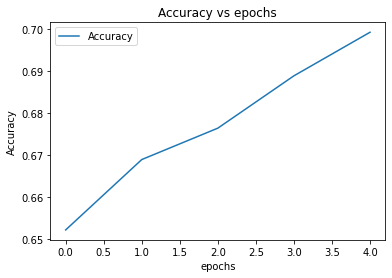

In [23]:
#plt.scatter(epoch_list, accuracy_list, c='r', label='data')
plt.plot(epoch_list, accuracy_list,label = 'Accuracy' )
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs epochs')
plt.legend()
plt.show()

torch.Size([1, 28, 28])
torch.Size([1, 1, 28, 28])


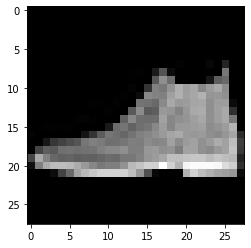

In [24]:
img,label = testing_dataset[0]
plt.imshow(img[0],cmap = 'gray')
print(img.shape)
print(img.unsqueeze(0).shape)  

In [25]:
# def predict_img(img,model):
#   xb = img.unsqueeze(0)
#   yb = model(xb)
#   _,preds = torch.max(yb,dim = 1)
#   return preds[0].item

Label:  9 Predicted <built-in method item of Tensor object at 0x7ff311e53b88>


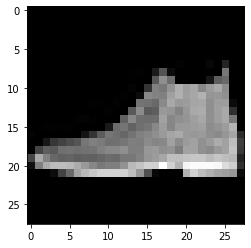

In [27]:
# img , label = testing_dataset[0]
# plt.imshow(img[0],cmap = 'gray')
# print('Label: ',label, 'Predicted', predict_img(img,model))


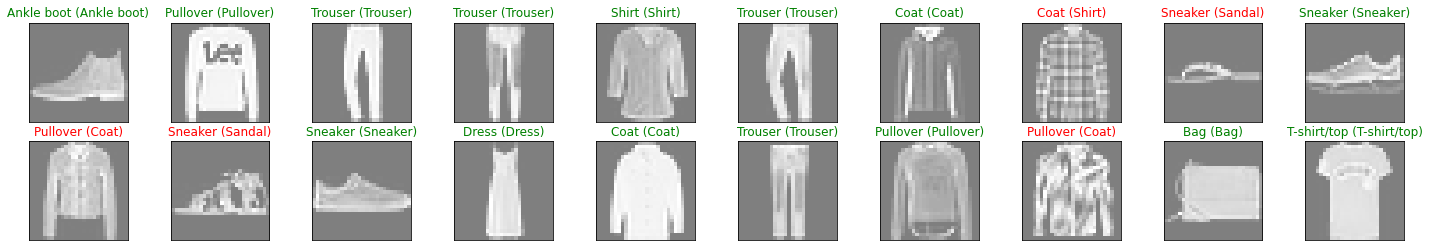

In [28]:
import numpy as np
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
  image = image.clip(0, 1)
  return image


classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' )

dataiter = iter(test_loader)
images, labels = dataiter.next()
output = model(images)
_, preds = torch.max(output, 1)

fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{} ({})".format(str(classes[preds[idx].item()]), str(classes[labels[idx].item()])), color=("green" if preds[idx]==labels[idx] else "red"))